In [255]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [256]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


drop 146 rows

In [258]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [260]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Internally Flawless (IF) No inclusions visible under 10x magnification.   
Very, Very Slightly Included (VVS1 and VVS2) Inclusions so slight they are difficult for a skilled grader to see under 10x magnification.  
Very Slightly Included (VS1 and VS2) Inclusions are observed with effort under 10x magnification, but can be characterized as minor.   
Slightly Included (SI1 and SI2) Inclusions are noticeable under 10x magnification.   
Included (I1, I2, and I3) Inclusions are obvious under 10x magnification which may affect transparency and brilliance.  
Clarity from high to low: IF - VVS1 - VVS2 - VS1 - VS2 - SI2 - SI2 - I1.   

In [261]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

cut rating: Ideal - Premium - Very good - Good - Fair

In [262]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [263]:
df.groupby('clarity')[['price','carat', 'depth','table','x','y','z']].mean().round(2).sort_values(by='price', ascending=False)

,price,carat,depth,table,x,y,z
clarity,,,,,,,
SI2,5057.46,1.08,61.77,57.93,6.40,6.40,3.95
SI1,3996.17,0.85,61.85,57.66,5.89,5.89,3.64
VS2,3927.74,0.76,61.72,57.42,5.66,5.66,3.49
I1,3925.28,1.28,62.74,58.30,6.76,6.71,4.21
VS1,3841.61,0.73,61.67,57.32,5.57,5.58,3.44
VVS2,3286.53,0.60,61.66,57.03,5.22,5.23,3.22
IF,2870.57,0.51,61.51,56.51,4.97,4.99,3.06
VVS1,2526.60,0.50,61.62,56.89,4.96,4.98,3.06


color rating: D - E - F - G - H - I - J.      
DEF COLORLESS       
GHIJ NEAR COLORLESS
https://www.gia.edu/gia-about/4cs-color

Color seems maters not a lot on price. Bc they look similar.   
it is hard to see big diamonds with DEF color

In [264]:
df.groupby('color')[['price','carat', 'depth','table','x','y','z']].mean().round(2).sort_values(by='price', ascending=False)

,price,carat,depth,table,x,y,z
color,,,,,,,
J,5326.42,1.16,61.89,57.81,6.52,6.52,4.03
I,5081.75,1.03,61.85,57.58,6.22,6.22,3.84
H,4482.86,0.91,61.83,57.52,5.98,5.98,3.70
G,4001.35,0.77,61.76,57.29,5.68,5.68,3.51
F,3726.75,0.74,61.69,57.43,5.62,5.62,3.47
D,3174.44,0.66,61.70,57.41,5.42,5.42,3.34
E,3079.61,0.66,61.66,57.49,5.41,5.42,3.34


In [265]:
df.groupby('cut')[['price', 'carat', 'depth', 'table', 'x', 'y', 'z']].mean().round(2).sort_values(by='price', ascending=False)


,price,carat,depth,table,x,y,z
cut,,,,,,,
Premium,4583.50,0.89,61.26,58.75,5.97,5.94,3.65
Fair,4341.95,1.04,64.02,59.07,6.24,6.18,3.98
Very Good,3981.02,0.81,61.82,57.96,5.74,5.77,3.56
Good,3919.12,0.85,62.37,58.69,5.84,5.85,3.64
Ideal,3462.75,0.70,61.71,55.95,5.51,5.52,3.40


In [266]:
df.describe(include=object)

,cut,color,clarity
count,53794,53794,53794
unique,5,7,8
top,Ideal,G,SI1
freq,21488,11262,13032


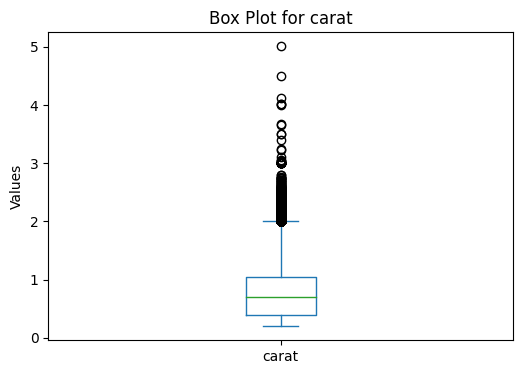

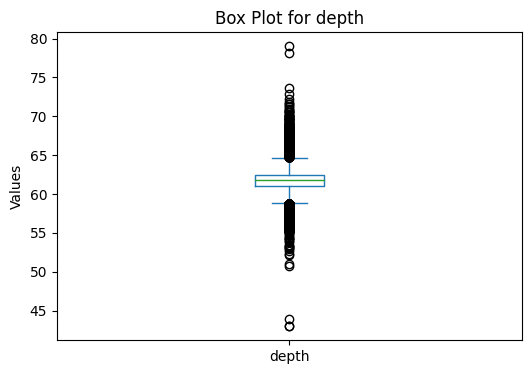

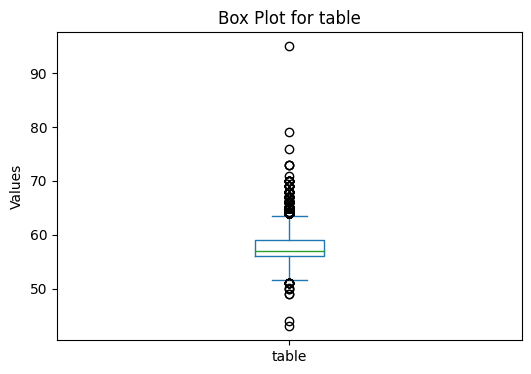

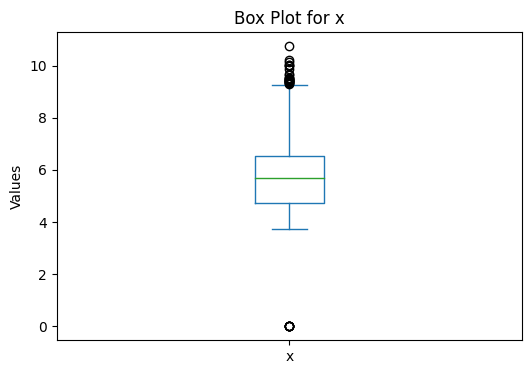

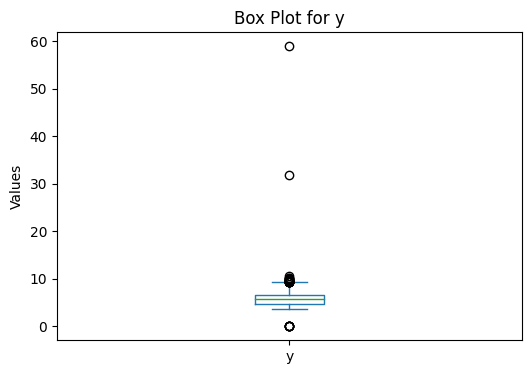

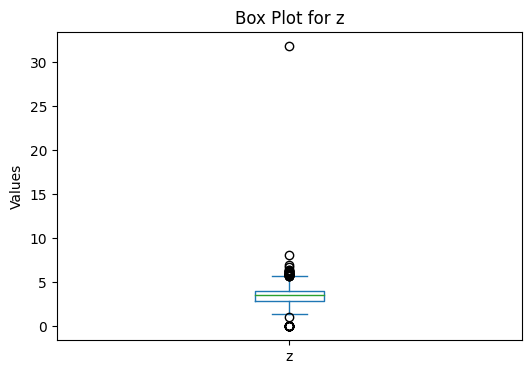

In [267]:
import matplotlib.pyplot as plt

# Iterate over columns
for column in df.columns:
    # Skip non-numeric columns
    if not df[column].dtype in [float, int]:
        continue
    
    # Create a box plot
    plt.figure(figsize=(6, 4))
    df[column].plot.box()
    
    # Set the title and labels
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    
    # Show the plot
    plt.show()


remove outliers.     
92.6% left.  

In [268]:
df = df[df['carat'] <= 3]
df = df[(df['depth'] >= 55) & (df['depth'] <= 70)]
df = df[(df['table'] >= 55) & (df['table'] <= 65)]
df = df[(df['x'] > 2) & (df['x'] <= 9)]
df = df[(df['y'] > 2) & (df['y'] < 20)]
df = df[df['z'] <= 10]

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49970 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49970 non-null  float64
 1   cut      49970 non-null  object 
 2   color    49970 non-null  object 
 3   clarity  49970 non-null  object 
 4   depth    49970 non-null  float64
 5   table    49970 non-null  float64
 6   price    49970 non-null  int64  
 7   x        49970 non-null  float64
 8   y        49970 non-null  float64
 9   z        49970 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ MB
